In [1]:
import pandas as pd
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
df.shape

(400, 5)

In [10]:
# Data Analysis
# People purchasing vs not perchasing
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:>

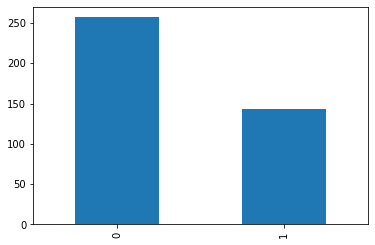

In [11]:
df['Purchased'].value_counts().plot(kind='bar')

In [12]:
p_df=df[df['Purchased']==1]
np_df=df[df['Purchased']==0]
p_df

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [13]:
np_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
377,15800215,Female,42,53000,0
380,15683758,Male,42,64000,0
387,15627220,Male,39,71000,0
394,15757632,Female,39,59000,0


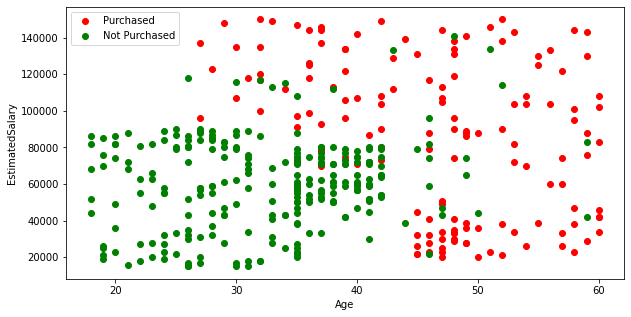

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(p_df['Age'], p_df['EstimatedSalary'], c='r', label='Purchased')
plt.scatter(np_df['Age'], np_df['EstimatedSalary'], c='g', label='Not Purchased')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()

In [21]:
# Divode the data into input and output
x=df.iloc[:,2:4].values # .values to convert data to numpy array
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42)

In [32]:
# normalisation using min max scalar method
# fit=finding the min value and max value
# transform = scaling the array from min max values
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [33]:
import numpy as np
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([63, 37], dtype=int64))

In [34]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([194, 106], dtype=int64))

In [35]:
print(len(x_train))
print(len(x_test))

300
100


In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [40]:
# Evaluation
# True positive: people purchased , predicted correctly
# True negative: people not purchased, predicted correctly
# False Positive: people purchased , not predicted correctly
# False negative: people not purchased, not predicted correctly

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[62,  1],
       [12, 25]], dtype=int64)

In [42]:
# Accuracy = True +ve + True -ve / (True +ve + True -ve + False +ve + False -ve)
(62+25)/(62+1+12+25)

0.87

In [43]:
accuracy_score(y_test, y_pred)

0.87

In [44]:
# recall, precision f1 score (for highly imbalanced dataset)

In [49]:
# plot Decision boundaries 
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

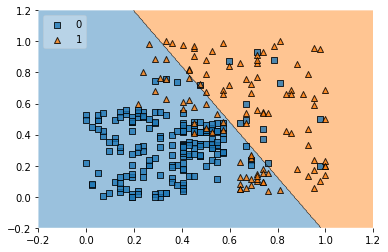

In [52]:
plot_decision_regions(x_train, y_train, clf=model, legend=2, zoom_factor=5)

<AxesSubplot:>

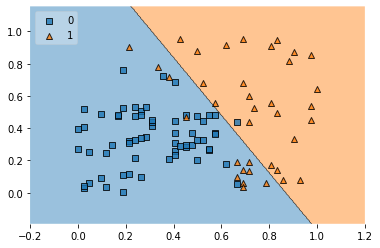

In [53]:
plot_decision_regions(x_test, y_test, clf=model, legend=2, zoom_factor=5)

In [54]:
confusion_matrix(y_test, y_pred)

array([[62,  1],
       [12, 25]], dtype=int64)